# Exercise





### Exercise 1:
Let's look at another column in this DataFrame, YEAR, which represents the year each respondent was interviewed.

Make an unnormalized PMF for YEAR and display the result. How many respondents were interviewed in 2018?

In which year was the repondents is largest, answer by build logic statement. 

In [1]:
try:
    from statadict import parse_stata_dict
except ImportError:
    !pip install statadict

In [2]:
# Read data dictionary
import gzip

dict_file = 'GSS.dct'
data_file = 'GSS.dat.gz'

stata_dict = parse_stata_dict(dict_file)

fp = gzip.open(data_file)

In [3]:
import pandas as pd

gss = pd.read_fwf(fp, 
                  names=stata_dict.names, 
                  colspecs=stata_dict.colspecs)
gss

,YEAR,ID_,AGE,EDUC,SEX,GUNLAW,GRASS,REALINC
0,1972,1,23,16,2,1,0,18951.0
1,1972,2,70,10,1,1,0,24366.0
2,1972,3,48,12,2,1,0,24366.0
3,1972,4,27,17,2,1,0,30458.0
4,1972,5,61,12,2,1,0,50763.0
...,...,...,...,...,...,...,...,...
64809,2018,2344,37,12,2,2,0,0.0
64810,2018,2345,75,12,2,2,0,14755.0
64811,2018,2346,67,12,2,1,1,45400.0
64812,2018,2347,72,16,1,0,2,24970.0


In [4]:
# Frequency table
from empiricaldist import Pmf

year = gss['YEAR']
pmf_year = Pmf.from_seq(year, normalize=False)
pmf_year

,probs
1972,1613
1973,1504
1974,1484
1975,1490
1976,1499
1977,1530
1978,1532
1980,1468
1982,1860
1983,1599


In [5]:
count_year18 = (year == 2018).value_counts()
print(f"Number of respondents interviewed in 2018: {count_year18[1]}")

Number of respondents interviewed in 2018: 2348


In [6]:
sorted_year = year.value_counts(sort=True)
sorted_year

2006    4510
1994    2992
1996    2904
2016    2867
1998    2832
2000    2817
2004    2812
2002    2765
2014    2538
2018    2348
2010    2044
2008    2023
2012    1974
1982    1860
1987    1819
1972    1613
1993    1606
1983    1599
1989    1537
1985    1534
1978    1532
1977    1530
1991    1517
1973    1504
1976    1499
1975    1490
1974    1484
1988    1481
1984    1473
1986    1470
1980    1468
1990    1372
Name: YEAR, dtype: int64

In [9]:
print("Year: ",end="")
print(pmf_year[pmf_year == max(sorted_year)])

Year: 2006    4510
Name: , dtype: int64


### Exercise II:

Using cdf_age, compute the fraction of the respondents in the GSS dataset that are older than 69.

In [10]:
from empiricaldist import Cdf
import numpy as np

# Clean the data
age = gss['AGE'].replace([98, 99], np.nan)

cdf_age = Cdf.from_seq(age)
cdf_age

,probs
18.0,0.003731
19.0,0.017063
20.0,0.030765
21.0,0.046465
22.0,0.063218
...,...
85.0,0.987319
86.0,0.990199
87.0,0.992491
88.0,0.994364


In [11]:
a = 69

# P(resp's age <= 69)
ple = cdf_age(a)

# P(resp's age > 69) = 1 - P(resp's age <= 69)
pg = 1 - ple

print(f"Probability that respondents will be older than 69: {pg}")
print("Percent: %.2f" %(pg * 100) + " %")

Probability that respondents will be older than 69: 0.12151240206855973
Percent: 12.15 %


### Exercise III:

The distribution of income in almost every country is long-tailed, which means there are a small number of people with very high incomes. In the GSS dataset, the column REALINC represents total household income, converted to 1986 dollars (REFERENCED value of Dollas). We can get a sense of the shape of this distribution by plotting the CDF.

Select REALINC from the gss dataset, make a Cdf called cdf_income, and plot it. Remember to label the axes!

Text(0.5, 1.0, 'Distribution of income')

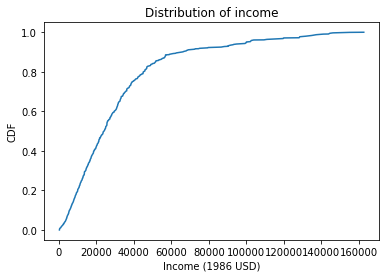

In [12]:
import matplotlib.pyplot as plt
from empiricaldist import Cdf

income = gss['REALINC'].replace(0, np.nan)
cdf_income = Cdf.from_seq(income)

cdf_income.plot()

plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.title('Distribution of income')

### Exercise IV:

What fraction of men are over 60? 
What fraction of women are over 60?

In [13]:
from empiricaldist import Cdf

male = (gss['SEX'] == 1)
female = (gss['SEX'] == 2)

male_age = age[male]
female_age = age[female]

cdf_male_age = Cdf.from_seq(male_age)
cdf_female_age = Cdf.from_seq(female_age)

a = 60

p_mle = cdf_male_age[a]
p_mg = 1 - p_mle
print("Percent (fraction) of men over 60: {0:.2f}%".format(p_mg * 100))

p_fle = cdf_female_age[a]
p_fg = 1 - p_fle
print("Percent (fraction) of women over 60: {0:.2f}%".format(p_fg * 100))

Percent (fraction) of men over 60: 21.40%
Percent (fraction) of women over 60: 24.47%


### Exercise V:
In the previous CDF icome figure, the dollar amounts are big enough that the labels on the x axis are crowded. Improve the figure by expressing income in 1000s of dollars (and update the x label accordingly).

Text(0.5, 1.0, 'Distribution of income')

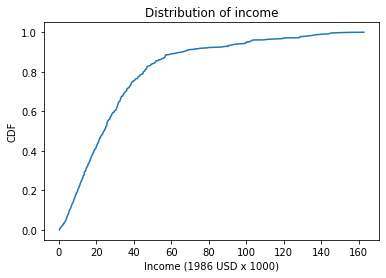

In [15]:
import matplotlib.pyplot as plt
from empiricaldist import Cdf

round_inc = gss['REALINC'] / 1000
round_inc = round_inc.replace(0, np.nan)

cdf_round_inc = Cdf.from_seq(round_inc)

cdf_round_inc.plot()

plt.xlabel('Income (1986 USD x 1000)')
plt.ylabel('CDF')
plt.title('Distribution of income')

## Exercise VI:
Let's compare incomes for different levels of education in the GSS dataset

To do that we'll create Boolean Series to identify respondents with different levels of education.

In the U.S, 12 years of education usually means the respondent has completed high school (secondary education).

A respondent with 14 years of education has probably completed an associate degree (two years of college)

Someone with 16 years has probably completed a bachelor's degree (four years of college or university).

Define Boolean Series named high, assc, and bach that are true for respondents with

12 or fewer years of education,

13, 14, or 15 years, and

16 or more.

Compute and plot the distribution of income for each group. Remember to label the CDFs, display a legend, and label the axes. Write a few sentences that describe and interpret the results.

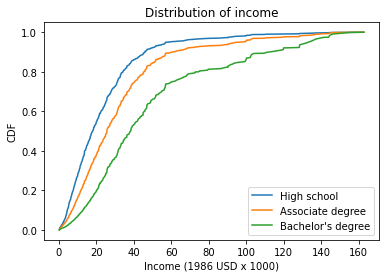

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from empiricaldist import Cdf

educ = gss['EDUC'].replace([98, 99], np.nan)

high = (educ <= 12)
assc = (educ == 13) | (educ == 14) | (educ == 15)
bach = (educ >= 16) 

income = (gss['REALINC'] / 1000).replace(0, np.nan) 

Cdf.from_seq(income[high]).plot(label="High school")
Cdf.from_seq(income[assc]).plot(label="Associate degree")
Cdf.from_seq(income[bach]).plot(label="Bachelor's degree")

plt.xlabel('Income (1986 USD x 1000)')
plt.ylabel('CDF')
plt.title('Distribution of income')
plt.legend()

At the beginning, when income is low, it can be seen that the High school graph increases the fastest, followed by Associate degree and Bachelor's degree respectively. This suggests that people who spend more time in education are less likely to have less income than people who spend less time in education.

The income continues to increase until it reaches a certain point, and the point at which each graph starts to pleateau is different, with High school graph first at around 40K, and followed by Associate degree (around 50K) and Bachelor's degree (almost 60K).

After this point, High school and Associate degree stays flatten more than Bachelor's degree suggesting that there are a higher chance to see people, with Bachelor's or higher degree who continue to earn more, than the chance of seeing the other groups earning more after the point where the graph flatten. 